In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msng    # normally this is imported under the alias 'msno'
                            # but this is the name of the user id column

import sys  
sys.path.append('/Users/kendra/data_science/Projects/sharedCode')

import util as u
import assess_clf_models as acm

%load_ext autoreload
%autoreload 2

/Users/kendra/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# X = u.open_pkl('Data/X_train.pkl')
df = u.open_pkl('Data/user_df.pkl')

In [3]:
df.columns

Index(['msno', 'is_churn', 'registered_via', 'registration_init_time',
       'num_25_mean', 'num_50_mean', 'num_75_mean', 'num_985_mean',
       'num_100_mean', 'num_unq_mean', 'num_songs_mean', 'num_songs_sum',
       'total_secs_mean', 'total_secs_sum', 'total_secs_count',
       'full_pct_mean', 'short_pct_mean', 'payment_method_most_common_mode',
       'payment_plan_days_mode', 'payment_plan_days_sum',
       'plan_list_price_mode', 'plan_list_price_sum',
       'actual_amount_paid_mode', 'actual_amount_paid_sum',
       'is_auto_renew_mode', 'is_auto_renew_sum', 'is_cancel_mode',
       'is_cancel_sum', 'trans_count', 'plan_actual_diff_abs_max',
       'plan_actual_diff_mode'],
      dtype='object')

In [21]:
# added these to previous data processing script after first time through:
if 1 == 1:
    df.rename(columns={'total_secs_count':'num_log_entries'}, inplace=True)

    df['time_since_registration'] = round((dt.datetime(year=2017, month=4, day=30) - df['registration_init_time']) 
                                     / dt.timedelta(days=30), 2)

/Users/kendra/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


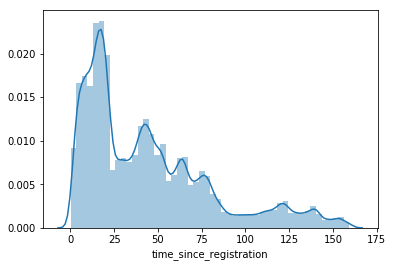

In [7]:
sns.distplot(df['time_since_registration'].dropna())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 32 columns):
msno                               970960 non-null object
is_churn                           970960 non-null int64
registered_via                     860967 non-null category
registration_init_time             860967 non-null datetime64[ns]
num_25_mean                        754540 non-null float64
num_50_mean                        754540 non-null float64
num_75_mean                        754540 non-null float64
num_985_mean                       754540 non-null float64
num_100_mean                       754540 non-null float64
num_unq_mean                       754540 non-null float64
num_songs_mean                     754540 non-null float64
num_songs_sum                      754540 non-null float64
total_secs_mean                    754540 non-null float64
total_secs_sum                     754540 non-null float64
num_log_entries                    754540 non-null float64

In [3]:
df['registered_via'] = df['registered_via'].astype('category')

### Missing Data

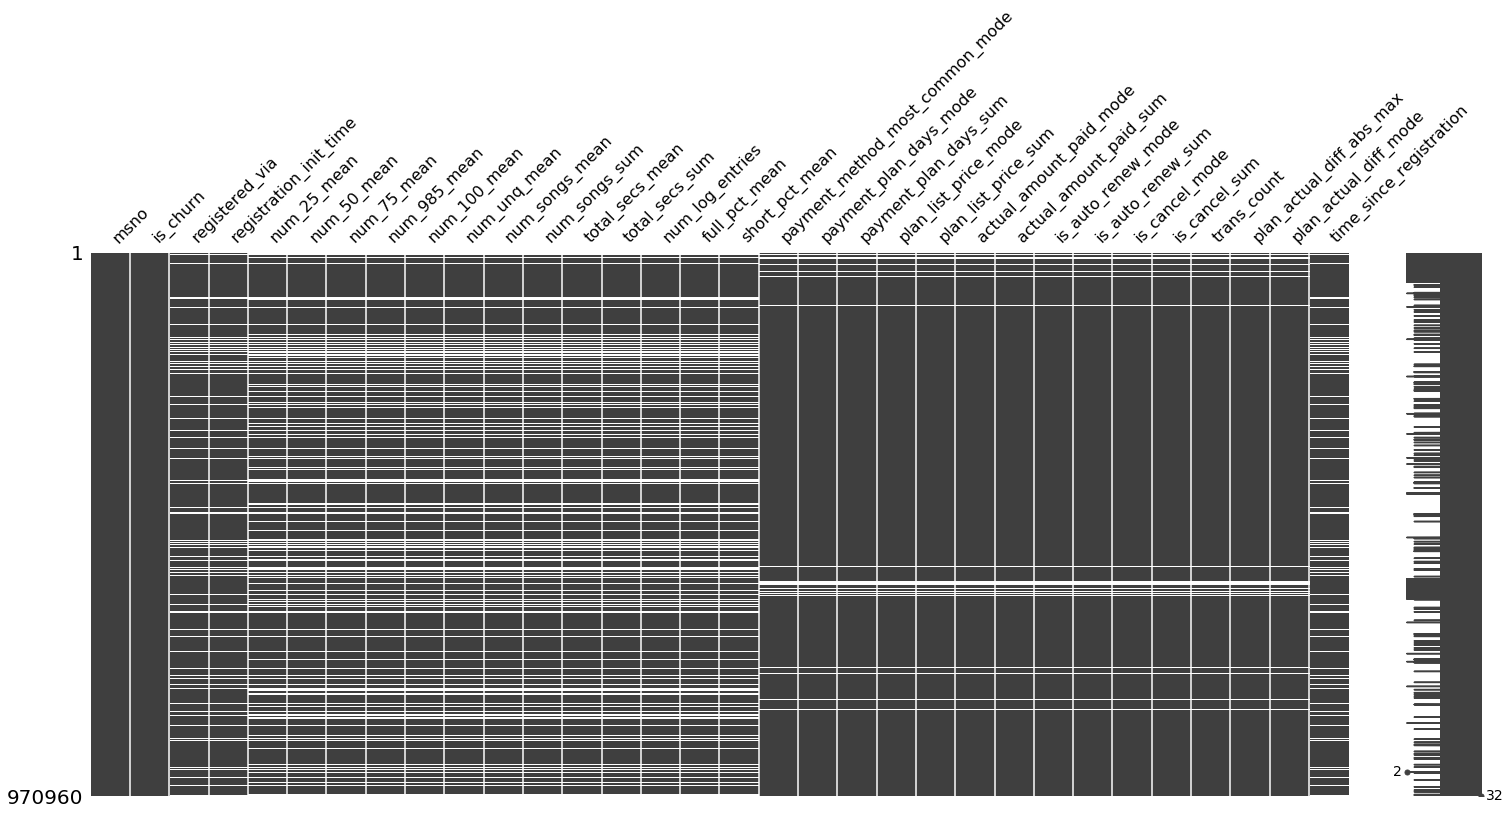

In [8]:
msng.matrix(df)

/Users/kendra/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


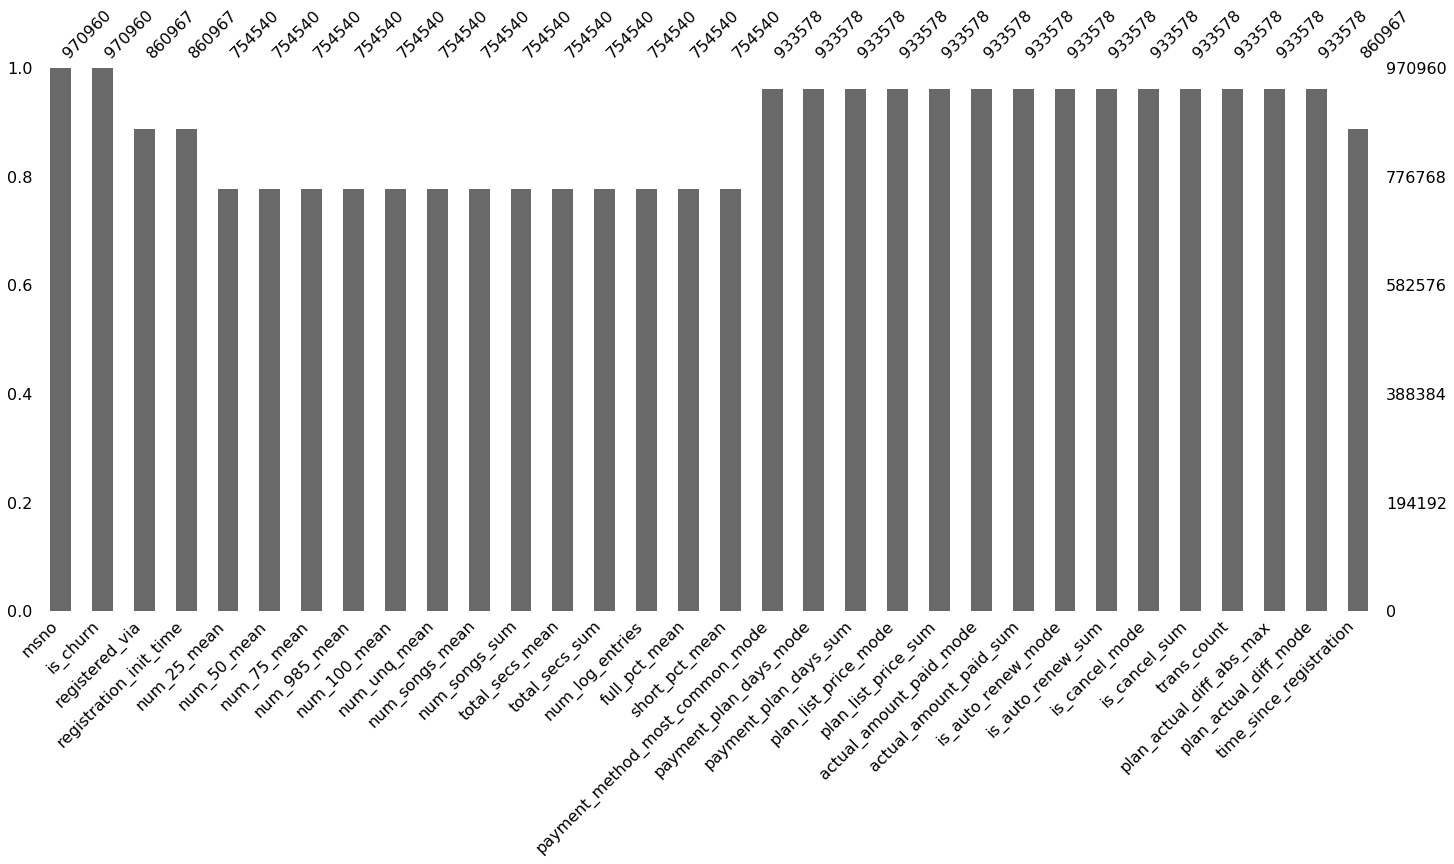

In [9]:
msng.bar(df)

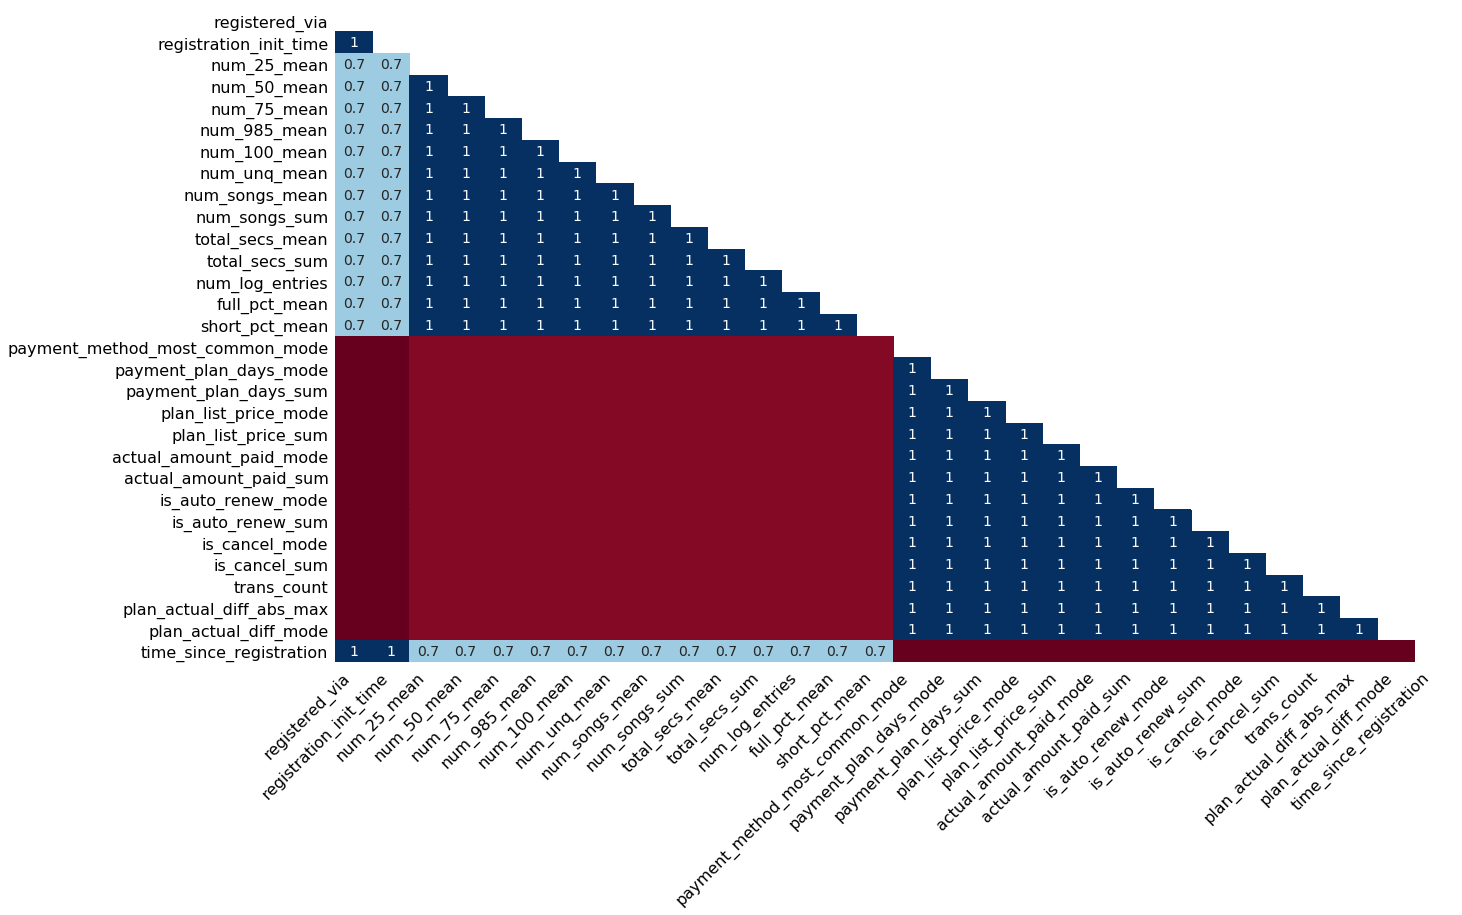

In [10]:
msng.heatmap(df)

In [11]:
len(df.dropna())/len(df)

0.7474159594627997

#### Missing data:
- At the least, need to keep transaction data
- At the worst, drop all na's and retain 75% of data
**For now: drop all na's**

In [23]:
df_drop = df.dropna()
# df_drop.reset_index(drop=True, inplace=True)

In [14]:
if 1 == 0:
    u.pkl_this('Data/user_df_drop_na.pkl', df_drop)

#### Create Train-Test split

In [5]:
from sklearn.model_selection import train_test_split

In [24]:
target = 'is_churn'
y = df_drop[target]
X = df_drop.drop(columns=target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# u.pkl_this('Data/X_train.pkl', X_train)
# u.pkl_this('Data/X_test.pkl', X_test)
# u.pkl_this('Data/y_train.pkl', y_train)
# u.pkl_this('Data/y_test.pkl', y_test)

df_train = X_train.join(y_train)
df_train.reset_index(drop=True, inplace=True)
df_train.head()

,msno,registered_via,registration_init_time,num_25_mean,num_50_mean,num_75_mean,num_985_mean,num_100_mean,num_unq_mean,num_songs_mean,...,actual_amount_paid_sum,is_auto_renew_mode,is_auto_renew_sum,is_cancel_mode,is_cancel_sum,trans_count,plan_actual_diff_abs_max,plan_actual_diff_mode,time_since_registration,is_churn
0,NF9Qpbjw79ucF619XR9cOKc7XIjPualjiziAWbztwTg=,7.0,2015-05-23,5.321429,1.071429,0.785714,0.964286,26.678571,28.000000,34.821429,...,149.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,23.60,0
1,W2YfPGxGsIexP06gFJMTdn4SIUUk9jREtgzNruO3/x0=,7.0,2014-11-24,4.758621,0.689655,0.275862,0.310345,9.206897,13.965517,15.241379,...,149.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,29.60,0
2,KGVzLdLo19XGyXX5226NGQrsvy44AgK2ia9RCkVyWZs=,3.0,2015-04-22,6.413793,1.379310,0.758621,0.689655,27.724138,34.655172,36.965517,...,149.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.63,0
3,VVLBCRNYweq9p5whg5zLXW/yZx8ttHY8K0Ao2O/usM4=,7.0,2015-12-02,2.250000,0.375000,0.125000,0.250000,13.375000,15.625000,16.375000,...,99.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,17.17,0
4,dh5ofsuNLBFuIQrTgAQbaf6RmXdXA2ZBiWwX1btl3hE=,7.0,2015-03-29,3.117647,0.117647,0.176471,0.470588,3.588235,7.235294,7.470588,...,149.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,25.43,0


In [51]:
np.sum(np.isfinite(df_train['is_churn']))

507997

#### Correlated features

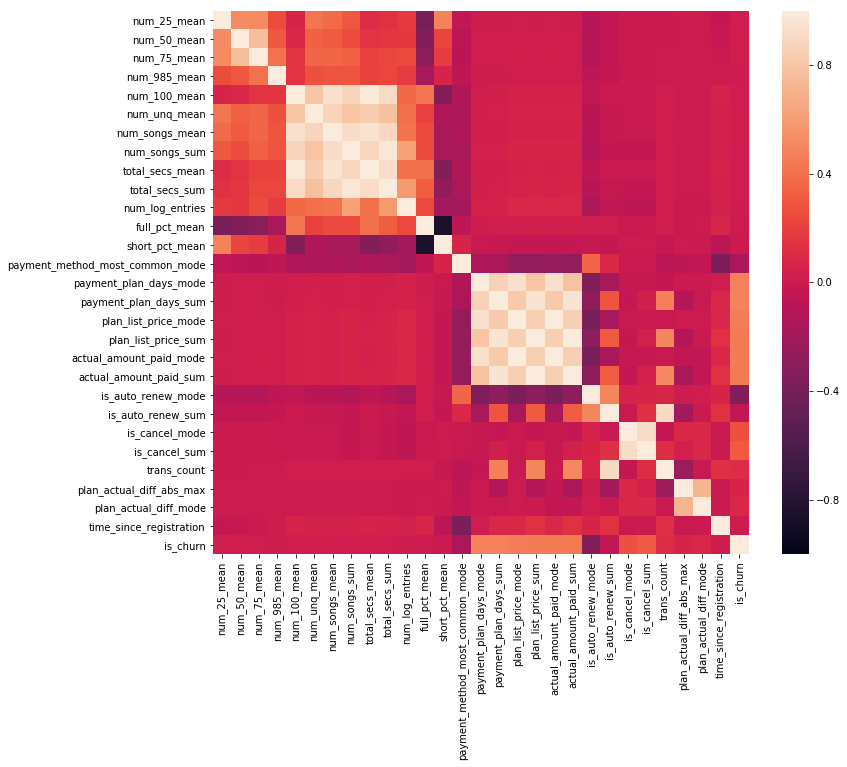

In [25]:
corr = df_train.corr()

fig = plt.figure(figsize=(12,10))
sns.heatmap(corr, vmin=-1, vmax=1);

- num_100, num_unq, total num songs (mean & sum), total_secs sum
    - compute PCA
- short_pct & full_pct (inverse)
    - keep short_pct
    - drop num_25 thru num_985

### PCA - song features

In [12]:
from sklearn.decomposition import PCA

In [26]:
pca_songs = PCA(n_components=1)
df_songs_pca = df_train[['num_100_mean', 'num_unq_mean', 'num_songs_mean', 'num_songs_sum',
       'total_secs_mean', 'total_secs_sum']]
songs_pca = pca_songs.fit_transform(df_songs_pca)

In [54]:
np.sum(np.isfinite(songs_pca)) == len(songs_pca)

True

/Users/kendra/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


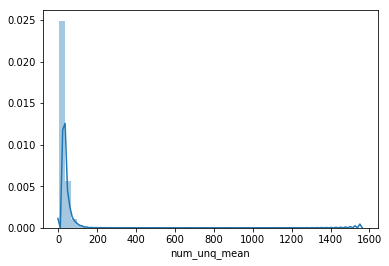

In [14]:
sns.distplot(df_train['num_unq_mean'])

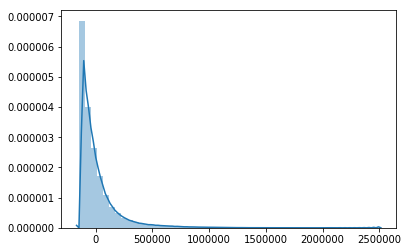

In [15]:
sns.distplot(songs_pca)

### Transaction features

In [27]:
trans_cols = ['payment_plan_days_mode', 'payment_plan_days_sum',
       'plan_list_price_mode', 'plan_list_price_sum',
       'actual_amount_paid_mode', 'actual_amount_paid_sum',
        'plan_actual_diff_abs_max', 'plan_actual_diff_mode',
       'is_auto_renew_mode', 'is_auto_renew_sum', 'is_cancel_mode',
       'is_cancel_sum', 'trans_count']

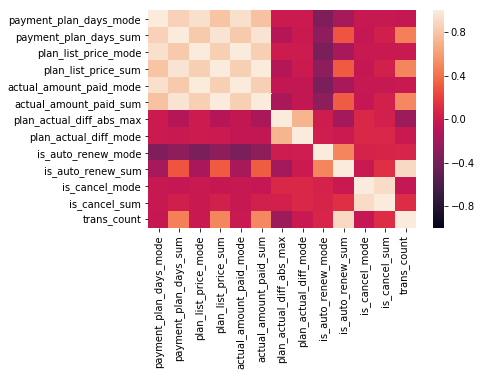

In [17]:
sns.heatmap(corr.loc[trans_cols, trans_cols], vmin=-1, vmax=1);

- transaction features:
    - PCA on payment_plan_days mode or sum, plan_list_price sum or mode or actual sum or mode
    - one of plan_actual_diff abs_max of mode
    - keep is_auto_renew mode, drop sum
    - keep is_cancel_mode, drop sum
    - keep trans_count

In [28]:
pca_trans = PCA(n_components=1)
df_trans_pca = df_train[['payment_plan_days_mode', 'payment_plan_days_sum',
       'plan_list_price_mode', 'plan_list_price_sum',
       'actual_amount_paid_mode', 'actual_amount_paid_sum']]
trans_pca = pca_songs.fit_transform(df_trans_pca)

In [55]:
np.sum(np.isfinite(trans_pca)) == len(trans_pca)

True

/Users/kendra/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


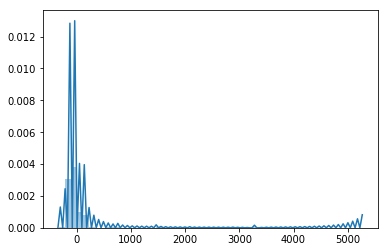

In [19]:
sns.distplot(trans_pca)

## Feature Set 1

In [29]:
fs_cols_1 = ['registered_via', 
             'short_pct_mean', 
             'payment_method_most_common_mode',
             'plan_actual_diff_abs_max',
             'is_auto_renew_mode', 'is_cancel_mode',
             'trans_count', 
             'time_since_registration']

df_feat1 = df_train[fs_cols_1]
df_feat1 = df_feat1.join(pd.DataFrame(songs_pca, columns=['song_pca']))
df_feat1 = df_feat1.join(pd.DataFrame(trans_pca, columns=['transactions_pca']))

In [36]:
if 1 == 0:
    u.pkl_this('Data/df_train_feature_set_1.pkl', df_feat1)

In [30]:
fs_cols_2 = fs_cols_1 + ['num_songs_mean', 'actual_amount_paid_mode']
df_feat2 = df_train[fs_cols_2]

### Pipeline / Pre-processing
- normalize numerical categories
- encode categorial
- leave Boolean (1/0) as-is

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

#### Numerical

In [33]:
# numerical features are in same positions in feature set 1 & 2, so only need to define one list & preprocessor
feat_num = ['short_pct_mean', 
             'plan_actual_diff_abs_max', 
             'trans_count', 
             'time_since_registration', 
             'song_pca', # num_songs_mean in feature set 2
             'transactions_pca'] # 'actual_amount_paid_mode' in feature set 2

# define this list for feature names
feat2_num = ['short_pct_mean', 
             'plan_actual_diff_abs_max', 
             'trans_count', 
             'time_since_registration', 
             'num_songs_mean',
             'actual_amount_paid_mode']

feat_num_idx = [list(df_feat1.columns).index(x) for x in feat_num]

# define Scaling preprocessor
preproc_scale = ColumnTransformer(transformers=[
    ('num', StandardScaler(), feat_num_idx)
])

# for models that don't require scaling, we want to pass-through these features:
preproc_num_pass = ColumnTransformer(transformers=[
    ('num', 'passthrough', feat_num_idx)
])

# feature names = feat_num or feat2_num

#### Categorial

In [34]:
import re

def fix_ohe_names(x):
    s = re.sub('x0', 'reg_via', x)
    s = re.sub('.0', '', s)
    return s

cat_cols = ['registered_via']
cat_cols_idx = [list(df_feat1.columns).index(x) for x in cat_cols]

preproc_ohe = ColumnTransformer(transformers=[('cat', OneHotEncoder(categories='auto'), cat_cols_idx)])

# fit to get feature names
preproc_ohe.fit(df_feat1)
feat_ohe = preproc_ohe.named_transformers_['cat'].get_feature_names()
feat_ohe = feat_ohe.tolist()

feat_ohe = list(map(fix_ohe_names, feat_ohe))
feat_ohe

['reg_via_3', 'reg_via_4', 'reg_via_7', 'reg_via_9', 'reg_via_13']

#### Boolean

In [35]:
pass_cols = ['payment_method_most_common_mode', 'is_auto_renew_mode', 'is_cancel_mode']
pass_cols_idx = [list(df_feat1.columns).index(x) for x in pass_cols]

preproc_pass = ColumnTransformer(transformers=[
        ('as_is', 'passthrough', pass_cols_idx), 
])

# feature names = pass_cols

### Sewing them together
**Scaling**

In [36]:
pipe_with_scale = Pipeline([
    ('all', FeatureUnion([
        ('ohe', preproc_ohe),
        ('num', preproc_scale),
        ('pass', preproc_pass)
    ])
    )
])

feat_names1 = feat_ohe + feat_num + pass_cols
feat_names2 = feat_ohe + feat2_num + pass_cols

**Scaling not needed**

In [37]:
pipe_no_scale = Pipeline([
    ('all', FeatureUnion([
        ('ohe', preproc_ohe),
        ('num', preproc_num_pass),
        ('pass', preproc_pass)
    ])
    )
])

Notes:
- CatBoost will not require any pre-processing. Will simply need to feed in the categorical columns (index 0)
- can also try feeding in data without pre-processing into tree-based models
    - see: https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

#### Test

In [38]:
trX1_scale = pipe_with_scale.fit_transform(df_feat1)
test_data = trX1_scale.todense()[0].tolist()[0]

trX1 = pipe_no_scale.fit_transform(df_feat1)
test_data_no_scale = trX1.todense()[0].tolist()[0]

test_df = pd.DataFrame({'not scaled':test_data_no_scale, 
             'scaled':test_data},
            index=feat_names1)

test_df.join(df_feat1.loc[0])

,not scaled,scaled,0
reg_via_3,0.000000,0.000000,NaN
reg_via_4,0.000000,0.000000,NaN
reg_via_7,1.000000,1.000000,NaN
reg_via_9,0.000000,0.000000,NaN
reg_via_13,0.000000,0.000000,NaN
short_pct_mean,0.131202,-0.340463,0.131202
plan_actual_diff_abs_max,0.000000,-0.036485,0
trans_count,1.000000,-0.227913,1
time_since_registration,23.600000,-0.586930,23.6
song_pca,41568.644966,0.224713,41568.6


## Modeling
Competition submissions were evaluated by log-loss, so include it in our metrics

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from catboost import CatBoostClassifier

In [40]:
log_reg = LogisticRegression(solver='liblinear')
rand_for = RandomForestClassifier(n_estimators=10)
grad_boost = GradientBoostingClassifier()
cb = CatBoostClassifier(cat_features=cat_cols_idx, logging_level='Silent')
dtb = BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [41]:
y_train.value_counts(1)

0    0.936063
1    0.063937
Name: is_churn, dtype: float64

Be aware our dataset is imbalanced

In [45]:
import numpy as np

In [46]:
check = np.isfinite(trX1_scale.todense()).tolist()

In [47]:
len(check) * len(check[0]) == np.sum(check)

True

In [48]:
fit_feat1_log_reg = acm.assess_model_2(pipe_with_scale, log_reg, df_feat1, y_train)

/Users/kendra/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [285]:
fit_feat1_log_reg

Precision-0                    0.957912
Recall-0 (Specificty)          0.993849
F1score-0                      0.975550
Precision-1                    0.802278
Recall-1 (Sensitivity)         0.363668
F1score-1                      0.500460
TN                        134986.200000
FN                          5931.000000
FP                           835.400000
TP                          3389.600000
AUC                            0.920155
Accuracy                       0.953381
LogLoss                        1.610172
dtype: float64

In [76]:
fit_feat2_log_reg = acm.assess_model_2(pipe_with_scale, log_reg, df_feat2, y_train)

/Users/kendra/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [56]:
# X = df_drop.drop(columns='is_churn')
# y = df_drop['is_churn']

In [58]:
len(X), len(y)

(725711, 725711)

In [60]:
test_X = df_drop[fs_cols_2]
test_X.head()

,registered_via,short_pct_mean,payment_method_most_common_mode,plan_actual_diff_abs_max,is_auto_renew_mode,is_cancel_mode,trans_count,time_since_registration,num_songs_mean,actual_amount_paid_mode
1,3.0,0.000000,0.0,0.0,0.0,0.0,1.0,40.80,5.333333,180.0
2,3.0,0.467898,0.0,0.0,0.0,0.0,1.0,40.67,27.750000,0.0
4,7.0,0.013364,1.0,0.0,1.0,0.0,6.0,39.70,65.733333,99.0
5,3.0,0.128788,0.0,0.0,1.0,1.0,1.0,39.67,12.250000,149.0
7,3.0,0.078042,0.0,0.0,0.0,0.0,1.0,39.43,37.645161,1788.0


In [61]:
test_log_reg = acm.assess_model_2(pipe_with_scale, log_reg, test_X, y)

/Users/kendra/data_science/Projects/sharedCode/assess_clf_models.py:70: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  pipe.fit(X.loc[train], y[train])
/Users/kendra/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
from sklearn.model_selection import cross_validate

In [64]:
X_train1_scaled = pipe_with_scale.fit_transform(df_feat1)

In [66]:
sorted(sklearn.metrics.SCORERS.keys())

NameError: name 'sklearn' is not defined

In [67]:
res = cross_validate(log_reg, X_train1_scaled, y_train, scoring='neg_log_loss', cv=5)

In [68]:
res

/Users/kendra/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([1.20237494, 1.07932806, 1.08960414, 1.1110599 , 1.06640983]),
 'score_time': array([0.03455114, 0.01807499, 0.01803088, 0.0185411 , 0.01822996]),
 'test_score': array([-0.1401127 , -0.13731042, -0.13937443, -0.1394053 , -0.1363225 ]),
 'train_score': array([-0.13806562, -0.13876762, -0.13825003, -0.13824177, -0.13901592])}

In [286]:
fit_feat2_log_reg

Precision-0                    0.957619
Recall-0 (Specificty)          0.993596
F1score-0                      0.975276
Precision-1                    0.793785
Recall-1 (Sensitivity)         0.359204
F1score-1                      0.494578
TN                        134951.800000
FN                          5972.600000
FP                           869.800000
TP                          3348.000000
AUC                            0.922288
Accuracy                       0.952857
LogLoss                        1.628257
dtype: float64

The two feature sets (1 = with PCA, 2 = selected un-transformed features) perform similarly in a logistic regression model

In [78]:
mini_results_rf = acm.assess_model_2(pipe_no_scale, rand_for, df_feat1, y_train)

/Users/kendra/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [287]:
mini_results_gb = acm.assess_model_2(pipe_no_scale, grad_boost, df_feat1, y)
mini_results_dtb = acm.assess_model_2(pipe_no_scale, dtb, df_feat1, y)

In [288]:
mini_results_rf

Precision-0                    0.971632
Recall-0 (Specificty)          0.992615
F1score-0                      0.982012
Precision-1                    0.842953
Recall-1 (Sensitivity)         0.577688
F1score-1                      0.685538
TN                        134818.600000
FN                          3936.200000
FP                          1003.000000
TP                          5384.400000
AUC                            0.895119
Accuracy                       0.965970
LogLoss                        1.175363
dtype: float64

In [289]:
mini_results_gb

Precision-0                    0.971828
Recall-0 (Specificty)          0.993936
F1score-0                      0.982758
Precision-1                    0.867863
Recall-1 (Sensitivity)         0.580135
F1score-1                      0.695388
TN                        134998.000000
FN                          3913.400000
FP                           823.600000
TP                          5407.200000
AUC                            0.949705
Accuracy                       0.967363
LogLoss                        1.127245
dtype: float64

In [290]:
mini_results_dtb

Precision-0                    0.971662
Recall-0 (Specificty)          0.992546
F1score-0                      0.981993
Precision-1                    0.841843
Recall-1 (Sensitivity)         0.578182
F1score-1                      0.685524
TN                        134809.200000
FN                          3931.600000
FP                          1012.400000
TP                          5389.000000
AUC                            0.896821
Accuracy                       0.965937
LogLoss                        1.176505
dtype: float64

In [292]:
mini_results_cb = acm.assess_model_only(cb, df_feat1, y)

In [293]:
comp_df = pd.DataFrame([fit_feat1_log_reg, fit_feat2_log_reg, mini_results_rf, mini_results_gb, mini_results_dtb, 
                        mini_results_cb],
             index=['LogReg','LogReg-FS2','RandFor','GradBst','Bagged-DecTr', 'Cat Boost'])
comp_df

,Precision-0,Recall-0 (Specificty),F1score-0,Precision-1,Recall-1 (Sensitivity),F1score-1,TN,FN,FP,TP,AUC,Accuracy,LogLoss
LogReg,0.957912,0.993849,0.975550,0.802278,0.363668,0.500460,134986.2,5931.0,835.4,3389.6,0.920155,0.953381,1.610172
LogReg-FS2,0.957619,0.993596,0.975276,0.793785,0.359204,0.494578,134951.8,5972.6,869.8,3348.0,0.922288,0.952857,1.628257
RandFor,0.971632,0.992615,0.982012,0.842953,0.577688,0.685538,134818.6,3936.2,1003.0,5384.4,0.895119,0.965970,1.175363
GradBst,0.971828,0.993936,0.982758,0.867863,0.580135,0.695388,134998.0,3913.4,823.6,5407.2,0.949705,0.967363,1.127245
Bagged-DecTr,0.971662,0.992546,0.981993,0.841843,0.578182,0.685524,134809.2,3931.6,1012.4,5389.0,0.896821,0.965937,1.176505
Cat Boost,0.972699,0.994085,0.983276,0.873170,0.593417,0.706603,135018.2,3789.6,803.4,5531.0,0.954258,0.968355,1.092978
